### Let's mount the google drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Installing pyspark module

In [2]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 76kB/s 
     |████████████████████████████████| 204kB 44.1MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=fcca3cf394d031fcc90411036f2087da801a9ed987b0f52a24c3973427914679
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


Importing the modules 

In [41]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct 
import matplotlib.pyplot as plts

creating spark session

In [4]:
spark= SparkSession.builder.appName('spark_app').getOrCreate()

## Importing the *Listenings.csv* file: 

In [5]:
listening_csv_path= '/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(listening_csv_path)

let's check the data:

In [6]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [7]:
listening_df=listening_df.drop('date')

drop the null rows:

In [8]:
listening_df=listening_df.na.drop()

let's check the dataset again:

In [9]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [10]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [15]:
#the basic difference between pandas dataframe and pyspark dataframe , pyspark dataframe does not have shape properly, so in order to see how many rows and columns we have is this dataset we have to count it like this:  

shape= (listening_df.count(), len(listening_df.columns))
print(f'rows,columns: {shape}')

rows,columns: (13758905, 4)


## Queries

**Query #0:**
select two columns: track and artist

In [16]:
q0 = listening_df.select('artist','track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [17]:

q1= listening_df.select('*').filter(listening_df.artist== 'Rihanna')
q1.show()

# * means everything or all.

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [28]:
#lets do this in steps for clear understanding :

#1. selecting those users who only listens Rihanna
q2=listening_df.select('user_id').filter(listening_df.artist=='Rihanna')
q2.show()

#2. finding the count how many time each user listen Rihanna by aggregate method (agg(count())). And by alias method giving a new column name 'count' to store the data of count in it.
q21= q2.groupby('user_id').agg(count('user_id').alias('count'))
q21.show()

#3. sorting the data of count in descending order by orderBy method and applying limit(10) to get top 10 items of it.
q22= q21.orderBy(desc('count')).limit(10)
q22.show()

#thats how we get top 10 users who are fan of Rihanna.

# we can also do the above steps in one line but for better understanding i did it in steps.
#for one line implementation: Run the below line in other cell and u will get same output.

#q2=listening_df.select('user_id').filter(listening_df.artist=='Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
#q2.show()


+-----------+
|    user_id|
+-----------+
|000Silenced|
|000Silenced|
|00williamsl|
|00williamsl|
|00williamsl|
|00williamsl|
|00williamsl|
|    0502008|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
+-----------+
only showing top 20 rows

+---------------+-----+
|        user_id|count|
+---------------+-----+
|         BolaJA|    3|
| chrisconfessed|    1|
|       CowChris|    1|
|    crazeysarah|    1|
|darkershadeofme|    4|
|      drinosaur|    4|
|         eastwu|    1|
|     EllieDearn|   17|
|    eyessetkyle|  166|
|  florence_yeah|    2|
|Freeze_The_Fire|    4|
|    fuzzzfusion|    1|
|         Gemo23|    1|
|     hannahsim1|    1|
|         inshed|   20|
|       jemazing|    1|
|        Jordy22|    4|
|      karlvogts|    1|
|         keeshe|    1|
|      kirrrrsty|    1|
+---------------+-----+
only showing top 20 rows

+---------------+-----+
|        use

**Query #3:**

find top 10 famous tracks 

In [32]:

q3= listening_df.select('artist','track').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()
#we are taking artist column also in account because there might be tracks of same name but of different artist. so it is imp to account it.

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 3381|
|Arctic Monkeys| Do I Wanna Know?| 2865|
|      Bon Iver|      Skinny Love| 2836|
|          Zayn|       PILLOWTALK| 2701|
|   The Killers|    Mr Brightside| 2690|
|       Rihanna|             Work| 2646|
|      Bastille|          Pompeii| 2606|
|Mumford & Sons|  Little Lion Man| 2520|
|Mumford & Sons|         The Cave| 2485|
| Justin Bieber|What Do You Mean?| 2481|
+--------------+-----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [33]:
q4= listening_df.select('artist','track').filter(listening_df.artist=='Rihanna').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [34]:
q5= listening_df.select('artist','album').groupby('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

#we are taking artist column also in account because there might be albums of same name but of different artist. so it is imp to account it.

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# importing the ***genre.csv*** file:

In [35]:
genre_csv_path= '/content/drive/MyDrive/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(genre_csv_path)

let's check the data

In [36]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [37]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

Let's inner join these two data frames

In [38]:
data= listening_df.join(genre_df,how='inner',on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [39]:
q6= data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [40]:
q7= data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Specific process
**Query #8**

find out each user favourite genre

In [44]:
q8_1 = data.select('user_id','genre').groupby('user_id','genre').agg(count('*').alias('count')).orderBy('user_id')
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|         folktronica|    2|
| --Seph|               Ruben|    4|
| --Seph|               indie|    3|
| --Seph| Sir Colin Davis ...|    1|
| --Seph|  progressive trance|    1|
| --Seph|               dance|    1|
| --Seph|   Alesso Feat Hurts|    1|
| --Seph| Boston Pops Orch...|    1|
| --Seph|                folk|   10|
| --Seph|          Nils Frahm|    1|
| --Seph|     Jennifer Vyvyan|    1|
| --Seph|           indie pop|    1|
| --Seph|               house|    3|
| --Seph|          electropop|    1|
| --Seph|   progressive house|    1|
| --Seph| The Ambrosian Si...|    1|
| --Seph| Tamás Vásáry & Y...|    1|
| --Seph|                soul|    1|
| --Seph|           classical|   31|
| --Seph|          Thom Yorke|    2|
+-------+--------------------+-----+
only showing top 20 rows



In [45]:
q8_2= q8_1.groupby('user_id').agg(max(struct(col('count'),col('genre'))).alias('max'))
q8_2.show()
#what happened here is:
#by using struct we combined columns count and genre together in one column and named it max by alias()
#and we found maximum count among all of the different genre realted to user_id .




+---------------+--------------------+
|        user_id|                 max|
+---------------+--------------------+
|        -Gemma-|   [38, british pop]|
|        247flix|      [78, synthpop]|
|     A3sahaettr|         [60, metal]|
|        AYFBlog|    [98, indie rock]|
|  AdamMcSpaddam|          [79, rock]|
|        Alukarl|   [85, death metal]|
|       Ambalina|           [53, pop]|
|        AndyEgg|          [54, rock]|
| AngerisaGift14|          [58, rock]|
|      Anndddyyy|         [116, rock]|
|     BasilBrush|          [63, rock]|
|     BernieLick|          [70, rock]|
|      Big_Tiger|         [54, indie]|
|          Birks|[36, singer-songw...|
|         BolaJA|          [59, rock]|
|        Boone92|     [46, metalcore]|
|CameronWhittall|           [91, pop]|
|        Ceolmor|    [48, electronic]|
| CheeseMonkey91|           [55, emo]|
|  Chilled-Lemon|         [100, rock]|
+---------------+--------------------+
only showing top 20 rows



In [46]:
#now what we have to do here is we just need to select the max.genre so we did here:
q8_3= q8_2.select(col('user_id'),col('max.genre'))
q8_3.show()

#finally we found each user favourite genre.

+---------------+-----------------+
|        user_id|            genre|
+---------------+-----------------+
|        -Gemma-|      british pop|
|        247flix|         synthpop|
|     A3sahaettr|            metal|
|        AYFBlog|       indie rock|
|  AdamMcSpaddam|             rock|
|        Alukarl|      death metal|
|       Ambalina|              pop|
|        AndyEgg|             rock|
| AngerisaGift14|             rock|
|      Anndddyyy|             rock|
|     BasilBrush|             rock|
|     BernieLick|             rock|
|      Big_Tiger|            indie|
|          Birks|singer-songwriter|
|         BolaJA|             rock|
|        Boone92|        metalcore|
|CameronWhittall|              pop|
|        Ceolmor|       electronic|
| CheeseMonkey91|              emo|
|  Chilled-Lemon|             rock|
+---------------+-----------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visualize it using bar chart 

In [50]:
q9= genre_df.select('genre').filter( (col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='metal') | (col('genre')=='hip hop') ).groupby('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [51]:
# this collect() method return all the rcords as a list of different row object.
q9_list= q9.collect()
print(q9_list)

#we can see in this list each row object has genre property and count property.
#so what we want to do is I want to create two list out of this , one is for labels(genres) and another for is values(counts). that we want to show in the barchart.

[Row(genre='pop', count=6960), Row(genre='hip hop', count=4288), Row(genre='metal', count=1854), Row(genre='rock', count=9066)]


In [52]:
genres= [item['genre'] for item in q9_list]
counts = [item['count'] for item in q9_list]

In [53]:
print(genres)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

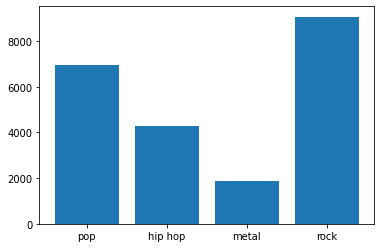

In [63]:
plts.bar(genres,counts)